<h1>Cleaning of Data and Exploratory Data Analysis</h1>

In [1]:
import pandas as pd
import numpy as np

In [2]:
Totals_df = pd.read_csv(r'C:\Users\ASUS\Desktop\Kaggle\PlayerData.csv')
Advanced_df = pd.read_csv(r'C:\Users\ASUS\Desktop\Kaggle\PlayerDataAdvanced.csv')

In [3]:
Totals_df

,Year,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1980,1,Kareem Abdul-Jabbar*,C,32,LAL,82,NaN,3143,835,...,0.765,190,696,886,371,81,280,297,216,2034
1,1980,2,Tom Abernethy,PF,25,GSW,67,NaN,1222,153,...,0.683,62,129,191,87,35,12,39,118,362
2,1980,3,Alvan Adams,C,25,PHO,75,NaN,2168,465,...,0.797,158,451,609,322,108,55,218,237,1118
3,1980,4,Tiny Archibald*,PG,31,BOS,80,80.0,2864,383,...,0.830,59,138,197,671,106,10,242,218,1131
4,1980,5,Dennis Awtrey,C,31,CHI,26,NaN,560,27,...,0.640,29,86,115,40,12,15,27,66,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20294,2019,528,Tyler Zeller,C,29,MEM,4,1.0,82,16,...,0.778,9,9,18,3,1,3,4,16,46
20295,2019,529,Ante Žižić,C,22,CLE,59,25.0,1082,183,...,0.705,108,212,320,53,13,22,61,113,459
20296,2019,530,Ivica Zubac,C,21,TOT,59,37.0,1040,212,...,0.802,115,247,362,63,14,51,70,137,525
20297,2019,530,Ivica Zubac,C,21,LAL,33,12.0,516,112,...,0.864,54,108,162,25,4,27,33,73,281


<h3> Sorting columns to be alphabetically in order </h3> 

In [4]:
#drop the Rk column
Totals_df.drop(["Rk"], axis=1, inplace = True)
Advanced_df.drop(["Rk"], axis=1, inplace = True)

In [5]:
#fixing names with * on them
def splitnames_firstname(x):
    try:
        namelist = x.split()
        if (len(namelist) > 2):
            firstname = " ".join(x.split()[:-1])
        else:
            firstname =  x.split()[0]
        return firstname
    except:
        return x


In [6]:
def splitnames_surname(x):
    try:
        return x.split()[-1]
    except:
        return x

In [7]:
Totals_df["Surname"] = Totals_df["Player"].apply(lambda x: splitnames_surname(x))
Totals_df["FirstName"] = Totals_df["Player"].apply(lambda x: splitnames_firstname(x))
Advanced_df["Surname"] = Advanced_df["Player"].apply(lambda x: splitnames_surname(x))
Advanced_df["FirstName"] = Advanced_df["Player"].apply(lambda x: splitnames_firstname(x))

In [8]:
Totals_df

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Surname,FirstName
0,1980,Kareem Abdul-Jabbar*,C,32,LAL,82,NaN,3143,835,1383,...,696,886,371,81,280,297,216,2034,Abdul-Jabbar*,Kareem
1,1980,Tom Abernethy,PF,25,GSW,67,NaN,1222,153,318,...,129,191,87,35,12,39,118,362,Abernethy,Tom
2,1980,Alvan Adams,C,25,PHO,75,NaN,2168,465,875,...,451,609,322,108,55,218,237,1118,Adams,Alvan
3,1980,Tiny Archibald*,PG,31,BOS,80,80.0,2864,383,794,...,138,197,671,106,10,242,218,1131,Archibald*,Tiny
4,1980,Dennis Awtrey,C,31,CHI,26,NaN,560,27,60,...,86,115,40,12,15,27,66,86,Awtrey,Dennis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20294,2019,Tyler Zeller,C,29,MEM,4,1.0,82,16,28,...,9,18,3,1,3,4,16,46,Zeller,Tyler
20295,2019,Ante Žižić,C,22,CLE,59,25.0,1082,183,331,...,212,320,53,13,22,61,113,459,Žižić,Ante
20296,2019,Ivica Zubac,C,21,TOT,59,37.0,1040,212,379,...,247,362,63,14,51,70,137,525,Zubac,Ivica
20297,2019,Ivica Zubac,C,21,LAL,33,12.0,516,112,193,...,108,162,25,4,27,33,73,281,Zubac,Ivica


In [9]:
#Rearranging the playerlist based on surname, firstname, Year
Totals_df.sort_values(by = ["Surname","FirstName",'Year'],axis = 0,inplace=True)
Advanced_df.sort_values(by = ["Surname","FirstName",'Year'],axis = 0,inplace=True)

In [10]:
Totals_df.reset_index(drop = True, inplace = True)
Advanced_df.reset_index(drop = True, inplace = True)

In [11]:
Totals_df["Player"] = Totals_df["Player"].apply(lambda x: x.strip('*'))
Advanced_df["Player"] = Advanced_df["Player"].apply(lambda x: x.strip('*'))
Advanced_df.head(20)

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,DWS,WS,WS/48,.1,OBPM,DBPM,BPM,VORP,Surname,FirstName
0,1991,Alaa Abdelnaby,PF,22,POR,43,290,13.1,0.499,0.000,...,0.5,0.5,0.079,NaN,-3.4,-1.2,-4.6,-0.2,Abdelnaby,Alaa
1,1992,Alaa Abdelnaby,PF,23,POR,71,934,13.5,0.533,0.000,...,1.5,2.1,0.110,NaN,-2.3,-0.4,-2.6,-0.1,Abdelnaby,Alaa
2,1993,Alaa Abdelnaby,PF,24,TOT,75,1311,13.2,0.551,0.002,...,1.3,2.0,0.074,NaN,-2.4,-1.5,-3.9,-0.6,Abdelnaby,Alaa
3,1993,Alaa Abdelnaby,PF,24,MIL,12,159,11.9,0.508,0.018,...,0.2,0.1,0.035,NaN,-3.3,-0.2,-3.5,-0.1,Abdelnaby,Alaa
4,1993,Alaa Abdelnaby,PF,24,BOS,63,1152,13.4,0.557,0.000,...,1.2,1.9,0.079,NaN,-2.3,-1.7,-4.0,-0.6,Abdelnaby,Alaa
5,1994,Alaa Abdelnaby,PF,25,BOS,13,159,9.2,0.485,0.000,...,0.1,-0.1,-0.032,NaN,-5.3,-2.2,-7.4,-0.2,Abdelnaby,Alaa
6,1995,Alaa Abdelnaby,PF,26,TOT,54,506,12.6,0.519,0.009,...,0.7,0.3,0.027,NaN,-4.4,0.1,-4.3,-0.3,Abdelnaby,Alaa
7,1995,Alaa Abdelnaby,PF,26,SAC,51,476,14.1,0.540,0.009,...,0.7,0.6,0.058,NaN,-3.6,0.5,-3.1,-0.1,Abdelnaby,Alaa
8,1995,Alaa Abdelnaby,PF,26,PHI,3,30,-12.5,0.091,0.000,...,0.0,-0.3,-0.466,NaN,-17.6,-7.3,-24.9,-0.2,Abdelnaby,Alaa
9,1980,Kareem Abdul-Jabbar,C,32,LAL,82,3143,25.3,0.639,0.001,...,5.3,14.8,0.227,NaN,4.8,2.4,7.2,7.3,Abdul-Jabbar*,Kareem


In [12]:
Advanced_df.drop(['\xa0','\xa0.1'], axis = 1, inplace = True)
Advanced_df.head(20)

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Surname,FirstName
0,1991,Alaa Abdelnaby,PF,22,POR,43,290,13.1,0.499,0.000,...,0.0,0.5,0.5,0.079,-3.4,-1.2,-4.6,-0.2,Abdelnaby,Alaa
1,1992,Alaa Abdelnaby,PF,23,POR,71,934,13.5,0.533,0.000,...,0.6,1.5,2.1,0.110,-2.3,-0.4,-2.6,-0.1,Abdelnaby,Alaa
2,1993,Alaa Abdelnaby,PF,24,TOT,75,1311,13.2,0.551,0.002,...,0.7,1.3,2.0,0.074,-2.4,-1.5,-3.9,-0.6,Abdelnaby,Alaa
3,1993,Alaa Abdelnaby,PF,24,MIL,12,159,11.9,0.508,0.018,...,0.0,0.2,0.1,0.035,-3.3,-0.2,-3.5,-0.1,Abdelnaby,Alaa
4,1993,Alaa Abdelnaby,PF,24,BOS,63,1152,13.4,0.557,0.000,...,0.7,1.2,1.9,0.079,-2.3,-1.7,-4.0,-0.6,Abdelnaby,Alaa
5,1994,Alaa Abdelnaby,PF,25,BOS,13,159,9.2,0.485,0.000,...,-0.2,0.1,-0.1,-0.032,-5.3,-2.2,-7.4,-0.2,Abdelnaby,Alaa
6,1995,Alaa Abdelnaby,PF,26,TOT,54,506,12.6,0.519,0.009,...,-0.4,0.7,0.3,0.027,-4.4,0.1,-4.3,-0.3,Abdelnaby,Alaa
7,1995,Alaa Abdelnaby,PF,26,SAC,51,476,14.1,0.540,0.009,...,-0.1,0.7,0.6,0.058,-3.6,0.5,-3.1,-0.1,Abdelnaby,Alaa
8,1995,Alaa Abdelnaby,PF,26,PHI,3,30,-12.5,0.091,0.000,...,-0.3,0.0,-0.3,-0.466,-17.6,-7.3,-24.9,-0.2,Abdelnaby,Alaa
9,1980,Kareem Abdul-Jabbar,C,32,LAL,82,3143,25.3,0.639,0.001,...,9.5,5.3,14.8,0.227,4.8,2.4,7.2,7.3,Abdul-Jabbar*,Kareem


In [13]:
Totals_df["Season"] = Totals_df["Year"].apply(lambda x: str(int(x) - 1) + "-" + "".join(list(str(x))[-2:]))
Advanced_df["Season"] = Advanced_df["Year"].apply(lambda x: str(int(x) - 1) + "-" + "".join(list(str(x))[-2:]))

In [14]:
#removing special characters from names
import unidecode
Totals_df["Player"] = Totals_df["Player"].apply(lambda x: unidecode.unidecode(x))
Advanced_df["Player"] = Advanced_df["Player"].apply(lambda x: unidecode.unidecode(x))
Totals_df

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Surname,FirstName,Season
0,1991,Alaa Abdelnaby,PF,22,POR,43,0.0,290,55,116,...,89,12,4,12,22,39,135,Abdelnaby,Alaa,1990-91
1,1992,Alaa Abdelnaby,PF,23,POR,71,1.0,934,178,361,...,260,30,25,16,66,132,432,Abdelnaby,Alaa,1991-92
2,1993,Alaa Abdelnaby,PF,24,TOT,75,52.0,1311,245,473,...,337,27,25,26,97,189,578,Abdelnaby,Alaa,1992-93
3,1993,Alaa Abdelnaby,PF,24,MIL,12,0.0,159,26,56,...,37,10,6,4,13,24,64,Abdelnaby,Alaa,1992-93
4,1993,Alaa Abdelnaby,PF,24,BOS,63,52.0,1152,219,417,...,300,17,19,22,84,165,514,Abdelnaby,Alaa,1992-93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20294,2004,Bruno Sundov,C,23,CLE,4,0.0,29,3,9,...,10,0,0,0,3,7,9,Šundov,Bruno,2003-04
20295,2004,Bruno Sundov,C,23,NYK,1,0.0,4,1,1,...,0,1,0,0,0,2,2,Šundov,Bruno,2003-04
20296,2005,Bruno Sundov,C,24,NYK,21,0.0,73,11,37,...,13,2,2,2,6,16,25,Šundov,Bruno,2004-05
20297,2018,Ante Zizic,C,21,CLE,32,2.0,214,49,67,...,60,5,2,13,11,30,119,Žižić,Ante,2017-18


In [15]:
Totals_df.drop(["Surname","FirstName"],axis = 1, inplace = True)
Advanced_df.drop(["Surname","FirstName"],axis = 1, inplace = True)

In [16]:
Totals_df["Player"] = Totals_df["Player"].apply(lambda x: ''.join(list(filter(lambda x: x!='.',list(x)))))
Advanced_df["Player"] = Advanced_df["Player"].apply(lambda x: ''.join(list(filter(lambda x: x!='.',list(x)))))

<h1> Dealing with Mid Season Trades </h1>

Players get traded mid season and we will only keep total stats for that year and remove the others

In [17]:
traded_tuple = tuple(zip(Totals_df.loc[Totals_df["Tm"] == "TOT"]["Year"],Totals_df.loc[Totals_df["Tm"] == "TOT"]["Player"],Totals_df.loc[Totals_df["Tm"] == "TOT"]["Age"]))
ind = list()
for combination in traded_tuple:
    ind.extend(Totals_df.loc[(Totals_df["Year"] == combination[0]) & (Totals_df["Player"] == combination[1]) & (Totals_df["Age"] ==            combination[2]) & (Totals_df["Tm"] != "TOT")].index.values.tolist())


In [18]:
traded_tuple_advanced = tuple(zip(Advanced_df.loc[Totals_df["Tm"] == "TOT"]["Year"],Advanced_df.loc[Totals_df["Tm"] == "TOT"]["Player"],Advanced_df.loc[Totals_df["Tm"] == "TOT"]["Age"]))
ind_advanced = list()
for combination in traded_tuple_advanced:
    ind_advanced.extend(Advanced_df.loc[(Totals_df["Year"] == combination[0]) & (Advanced_df["Player"] == combination[1]) & (Advanced_df["Age"] == combination[2]) & (Advanced_df["Tm"] != "TOT")].index.values.tolist())

In [19]:
Totals_df = Totals_df.drop(ind).reset_index(drop = True)
Advanced_df = Advanced_df.drop(ind).reset_index(drop = True)

In [20]:
Advanced_df

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Season
0,1991,Alaa Abdelnaby,PF,22,POR,43,290,13.1,0.499,0.000,...,22.1,0.0,0.5,0.5,0.079,-3.4,-1.2,-4.6,-0.2,1990-91
1,1992,Alaa Abdelnaby,PF,23,POR,71,934,13.5,0.533,0.000,...,20.6,0.6,1.5,2.1,0.110,-2.3,-0.4,-2.6,-0.1,1991-92
2,1993,Alaa Abdelnaby,PF,24,TOT,75,1311,13.2,0.551,0.002,...,20.5,0.7,1.3,2.0,0.074,-2.4,-1.5,-3.9,-0.6,1992-93
3,1994,Alaa Abdelnaby,PF,25,BOS,13,159,9.2,0.485,0.000,...,22.6,-0.2,0.1,-0.1,-0.032,-5.3,-2.2,-7.4,-0.2,1993-94
4,1995,Alaa Abdelnaby,PF,26,TOT,54,506,12.6,0.519,0.009,...,25.6,-0.4,0.7,0.3,0.027,-4.4,0.1,-4.3,-0.3,1994-95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16609,2003,Bruno Sundov,C,22,BOS,26,138,1.2,0.281,0.286,...,22.2,-0.6,0.2,-0.4,-0.139,-8.7,-1.1,-9.8,-0.3,2002-03
16610,2004,Bruno Sundov,C,23,TOT,5,33,3.5,0.435,0.000,...,21.3,-0.1,0.0,0.0,-0.046,-9.1,-1.6,-10.7,-0.1,2003-04
16611,2005,Bruno Sundov,C,24,NYK,21,73,1.2,0.330,0.081,...,27.4,-0.3,0.0,-0.3,-0.174,-10.4,-3.3,-13.6,-0.2,2004-05
16612,2018,Ante Zizic,C,21,CLE,32,214,24.2,0.746,0.000,...,18.8,0.9,0.2,1.0,0.231,1.9,-0.9,1.0,0.2,2017-18


In [21]:
#Combining the 2 dataframes to include columns unique to each dataset
columns_in_advanced = Advanced_df.columns.tolist()
columns_in_totals = Totals_df.columns.tolist()
#features in Advanced_df which are not in Totals_df
unique_features_advanced = [i for i in columns_in_advanced if ((i not in columns_in_totals) | ((i == "Year") | (i == "Player") | (i == "Age") | (i == "Tm") | (i == "Season")))]

In [22]:
unique_features_advanced

['Year',
 'Player',
 'Age',
 'Tm',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP',
 'Season']

In [23]:
Advanced_df = Advanced_df[unique_features_advanced]
Advanced_df.head(20)

,Year,Player,Age,Tm,PER,TS%,3PAr,FTr,ORB%,DRB%,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Season
0,1991,Alaa Abdelnaby,22,POR,13.1,0.499,0.000,0.379,10.4,23.4,...,22.1,0.0,0.5,0.5,0.079,-3.4,-1.2,-4.6,-0.2,1990-91
1,1992,Alaa Abdelnaby,23,POR,13.5,0.533,0.000,0.280,9.5,20.9,...,20.6,0.6,1.5,2.1,0.110,-2.3,-0.4,-2.6,-0.1,1991-92
2,1993,Alaa Abdelnaby,24,TOT,13.2,0.551,0.002,0.245,11.0,18.1,...,20.5,0.7,1.3,2.0,0.074,-2.4,-1.5,-3.9,-0.6,1992-93
3,1994,Alaa Abdelnaby,25,BOS,9.2,0.485,0.000,0.455,8.5,24.2,...,22.6,-0.2,0.1,-0.1,-0.032,-5.3,-2.2,-7.4,-0.2,1993-94
4,1995,Alaa Abdelnaby,26,TOT,12.6,0.519,0.009,0.152,8.7,17.4,...,25.6,-0.4,0.7,0.3,0.027,-4.4,0.1,-4.3,-0.3,1994-95
5,1980,Kareem Abdul-Jabbar,32,LAL,25.3,0.639,0.001,0.344,7.2,22.2,...,24.1,9.5,5.3,14.8,0.227,4.8,2.4,7.2,7.3,1979-80
6,1981,Kareem Abdul-Jabbar,33,LAL,25.5,0.616,0.001,0.379,7.6,21.5,...,26.3,9.6,4.6,14.3,0.230,4.7,1.4,6.1,6.1,1980-81
7,1982,Kareem Abdul-Jabbar,34,LAL,23.4,0.608,0.002,0.340,7.3,19.1,...,25.6,6.9,3.9,10.7,0.192,3.8,1.2,5.0,4.7,1981-82
8,1983,Kareem Abdul-Jabbar,35,LAL,23.6,0.619,0.002,0.302,7.6,17.6,...,24.6,8.0,2.9,10.9,0.205,4.0,0.5,4.5,4.2,1982-83
9,1984,Kareem Abdul-Jabbar,36,LAL,21.3,0.608,0.001,0.318,7.8,16.8,...,25.1,5.9,3.1,8.9,0.163,2.8,0.2,3.0,3.3,1983-84


In [24]:
#merging TOtals_df and Advanced_df
Complete_df = pd.merge(Totals_df,Advanced_df, how = 'inner',on=['Year','Player','Age','Tm','Season'])
Complete_df.head(20)

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1991,Alaa Abdelnaby,PF,22,POR,43,0.0,290,55,116,...,14.0,22.1,0.0,0.5,0.5,0.079,-3.4,-1.2,-4.6,-0.2
1,1992,Alaa Abdelnaby,PF,23,POR,71,1.0,934,178,361,...,14.0,20.6,0.6,1.5,2.1,0.110,-2.3,-0.4,-2.6,-0.1
2,1993,Alaa Abdelnaby,PF,24,TOT,75,52.0,1311,245,473,...,15.6,20.5,0.7,1.3,2.0,0.074,-2.4,-1.5,-3.9,-0.6
3,1994,Alaa Abdelnaby,PF,25,BOS,13,0.0,159,24,55,...,20.5,22.6,-0.2,0.1,-0.1,-0.032,-5.3,-2.2,-7.4,-0.2
4,1995,Alaa Abdelnaby,PF,26,TOT,54,0.0,506,118,231,...,15.4,25.6,-0.4,0.7,0.3,0.027,-4.4,0.1,-4.3,-0.3
5,1980,Kareem Abdul-Jabbar,C,32,LAL,82,NaN,3143,835,1383,...,15.7,24.1,9.5,5.3,14.8,0.227,4.8,2.4,7.2,7.3
6,1981,Kareem Abdul-Jabbar,C,33,LAL,80,NaN,2976,836,1457,...,12.8,26.3,9.6,4.6,14.3,0.230,4.7,1.4,6.1,6.1
7,1982,Kareem Abdul-Jabbar,C,34,LAL,76,76.0,2677,753,1301,...,13.3,25.6,6.9,3.9,10.7,0.192,3.8,1.2,5.0,4.7
8,1983,Kareem Abdul-Jabbar,C,35,LAL,79,79.0,2554,722,1228,...,12.6,24.6,8.0,2.9,10.9,0.205,4.0,0.5,4.5,4.2
9,1984,Kareem Abdul-Jabbar,C,36,LAL,80,80.0,2622,716,1238,...,13.5,25.1,5.9,3.1,8.9,0.163,2.8,0.2,3.0,3.3


In [25]:
Complete_df.columns.tolist()

['Year',
 'Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'Season',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP']

<h2> Start Data Cleaning </h2> 

In [26]:
#finding the number of missing values in each column
def numberofnan(dataset):
    column_labels = dataset.columns.tolist()[1:-1]
    num_missingvalues = list()
    percentage_missingvalues = list()
    for column in column_labels:
        num_missingvalues.append(dataset[column].isna().sum())
        percentage_missingvalues.append(100*(dataset[column].isna().sum())/dataset[column].shape[0])
    missing_value_percentage_df = pd.DataFrame({'Column Name':column_labels,'Number of Missing values':num_missingvalues,'% of missing values':percentage_missingvalues})
    return missing_value_percentage_df

In [27]:
missing_data_df = numberofnan(Complete_df)
display(missing_data_df.style.background_gradient(cmap = 'Reds',axis = 0))

,Column Name,Number of Missing values,% of missing values
0,Player,0,0.000000
1,Pos,0,0.000000
2,Age,0,0.000000
3,Tm,0,0.000000
4,G,0,0.000000
5,GS,547,3.292404
6,MP,0,0.000000
7,FG,0,0.000000
8,FGA,0,0.000000
9,FG%,51,0.306970


<h3> Filling out missing values for FG% </h3> 

In [28]:
#Usually is both FG and FGA are zero, FG% tends to become NaN. A Good way to check this is to find the sum of FG and FGA for these values. If these values are equal to zero, then we set FG% to zero toop
print("Sum of FG : {}".format(Complete_df.loc[Complete_df["FG%"].isna()]["FG"].sum()))
print("Sum of FGA : {}".format(Complete_df.loc[Complete_df["FG%"].isna()]["FGA"].sum()))

Sum of FG : 0
Sum of FGA : 0


In [29]:
Complete_df.loc[Complete_df["FG%"].isna(),'FG%'] = float(0)

In [30]:
missing_data_df = numberofnan(Complete_df)
display(missing_data_df.style.background_gradient(cmap = 'Reds',axis = 0))

,Column Name,Number of Missing values,% of missing values
0,Player,0,0.000000
1,Pos,0,0.000000
2,Age,0,0.000000
3,Tm,0,0.000000
4,G,0,0.000000
5,GS,547,3.292404
6,MP,0,0.000000
7,FG,0,0.000000
8,FGA,0,0.000000
9,FG%,0,0.000000


<h3>Filling out missing values for FG%</h3>

In [31]:
#same approach is followed to fill in the 3P%
print("Sum of 3P : {}".format(Complete_df.loc[Complete_df["3P%"].isna()]["3P"].sum()))
print("Sum of 3PA : {}".format(Complete_df.loc[Complete_df["3P%"].isna()]["3PA"].sum()))

Sum of 3P : 0
Sum of 3PA : 0


In [32]:
Complete_df.loc[Complete_df["3P%"].isna(),'3P%'] = float(0)

In [33]:
missing_data_df = numberofnan(Complete_df)
display(missing_data_df.style.background_gradient(cmap = 'Reds',axis = 0))

,Column Name,Number of Missing values,% of missing values
0,Player,0,0.000000
1,Pos,0,0.000000
2,Age,0,0.000000
3,Tm,0,0.000000
4,G,0,0.000000
5,GS,547,3.292404
6,MP,0,0.000000
7,FG,0,0.000000
8,FGA,0,0.000000
9,FG%,0,0.000000


<h3> Filling out missing values for 2P% </h3> 

In [34]:
#same approach is followed to fill in the 2P%
print("Sum of 2P : {}".format(Complete_df.loc[Complete_df["2P%"].isna()]["2P"].sum()))
print("Sum of 2PA : {}".format(Complete_df.loc[Complete_df["2P%"].isna()]["2PA"].sum()))

Sum of 2P : 0
Sum of 2PA : 0


In [35]:
Complete_df.loc[Complete_df["2P%"].isna(),'2P%'] = float(0)

In [36]:
missing_data_df = numberofnan(Complete_df)
display(missing_data_df.style.background_gradient(cmap = 'Reds',axis = 0))

,Column Name,Number of Missing values,% of missing values
0,Player,0,0.000000
1,Pos,0,0.000000
2,Age,0,0.000000
3,Tm,0,0.000000
4,G,0,0.000000
5,GS,547,3.292404
6,MP,0,0.000000
7,FG,0,0.000000
8,FGA,0,0.000000
9,FG%,0,0.000000


<h3> Missing values of eFG% </h3> 

eFG% is the the result of (FG + (0.5 * 3P))/(FGA). 

In [37]:
#eFG% is dependant on FG, 3P and FGA
#check if the sum of all these values is equal to zero
print("Sum of FG : {}".format(Complete_df.loc[Complete_df["eFG%"].isna()]["FG"].sum()))
print("Sum of FGA : {}".format(Complete_df.loc[Complete_df["eFG%"].isna()]["FGA"].sum()))
print("Sum of 3P : {}".format(Complete_df.loc[Complete_df["eFG%"].isna()]["3P"].sum()))

Sum of FG : 0
Sum of FGA : 0
Sum of 3P : 0


In [38]:
#eFG% can be filled with 0 as all the features which make it is also 0
Complete_df.loc[Complete_df["eFG%"].isna(),"eFG%"] = float(0)
missing_data_df = numberofnan(Complete_df)
display(missing_data_df.style.background_gradient(cmap = 'Reds',axis = 0))

,Column Name,Number of Missing values,% of missing values
0,Player,0,0.000000
1,Pos,0,0.000000
2,Age,0,0.000000
3,Tm,0,0.000000
4,G,0,0.000000
5,GS,547,3.292404
6,MP,0,0.000000
7,FG,0,0.000000
8,FGA,0,0.000000
9,FG%,0,0.000000


<h3> Filling out missing values for FT% </h3> 

In [39]:
#same approach is followed to fill in the FT%
print("Sum of FT : {}".format(Complete_df.loc[Complete_df["FT%"].isna()]["FT"].sum()))
print("Sum of FTA : {}".format(Complete_df.loc[Complete_df["FT%"].isna()]["FTA"].sum()))

Sum of FT : 0
Sum of FTA : 0


In [40]:
Complete_df.loc[Complete_df["FT%"].isna(),'FT%'] = float(0)
missing_data_df = numberofnan(Complete_df)
display(missing_data_df.style.background_gradient(cmap = 'Reds',axis = 0))

,Column Name,Number of Missing values,% of missing values
0,Player,0,0.000000
1,Pos,0,0.000000
2,Age,0,0.000000
3,Tm,0,0.000000
4,G,0,0.000000
5,GS,547,3.292404
6,MP,0,0.000000
7,FG,0,0.000000
8,FGA,0,0.000000
9,FG%,0,0.000000


<h3> Filling in PER values </h3> 

PER is the Player Efficiency Rating which is a measure of the per minute production of a player.

In [41]:
#PER is a measure of per minute production however these players have not played even a minute. However the equation required to calculate PER is complex and given that this is only for 3 instances, we shall remove these 3 instances from the dataset
Complete_df = Complete_df.drop(Complete_df.loc[Complete_df["PER"].isna()].index.values.tolist()).reset_index(drop = True)
missing_data_df = numberofnan(Complete_df)
display(missing_data_df.style.background_gradient(cmap = 'Reds',axis = 0))

,Column Name,Number of Missing values,% of missing values
0,Player,0,0.000000
1,Pos,0,0.000000
2,Age,0,0.000000
3,Tm,0,0.000000
4,G,0,0.000000
5,GS,547,3.292999
6,MP,0,0.000000
7,FG,0,0.000000
8,FGA,0,0.000000
9,FG%,0,0.000000


<h3> Missing values of True Shooting % (TS%) </h3>

TS% is also a calculated formula. The formula is **PTS/(2*TSA)** and is TSA is equal to **FGA + 0.44 * FTA**. 

In [42]:
#checking if values are equal to 0
print("Sum of PTS : {}".format(Complete_df.loc[Complete_df["TS%"].isna()]["PTS"].sum()))
print("Sum of FGA : {}".format(Complete_df.loc[Complete_df["TS%"].isna()]["FGA"].sum()))
print("Sum of FTA : {}".format(Complete_df.loc[Complete_df["TS%"].isna()]["FTA"].sum()))

Sum of PTS : 0
Sum of FGA : 0
Sum of FTA : 0


In [43]:
Complete_df.loc[Complete_df["TS%"].isna(),'TS%'] = float(0)
missing_data_df = numberofnan(Complete_df)
display(missing_data_df.style.background_gradient(cmap = 'Reds',axis = 0))

,Column Name,Number of Missing values,% of missing values
0,Player,0,0.000000
1,Pos,0,0.000000
2,Age,0,0.000000
3,Tm,0,0.000000
4,G,0,0.000000
5,GS,547,3.292999
6,MP,0,0.000000
7,FG,0,0.000000
8,FGA,0,0.000000
9,FG%,0,0.000000


<h3>Missing values of 3 Point Attemt Rate (3PAr) </h3>
3PAr is equal to 3PA/FGA. 

In [44]:
print("Sum of 3PA : {}".format(Complete_df.loc[Complete_df["3PAr"].isna()]["3PA"].sum()))
print("Sum of FGA : {}".format(Complete_df.loc[Complete_df["3PAr"].isna()]["FGA"].sum()))

Sum of 3PA : 0
Sum of FGA : 0


In [45]:
Complete_df.loc[Complete_df["3PAr"].isna(),'3PAr'] = float(0)
missing_data_df = numberofnan(Complete_df)
display(missing_data_df.style.background_gradient(cmap = 'Reds',axis = 0))

,Column Name,Number of Missing values,% of missing values
0,Player,0,0.000000
1,Pos,0,0.000000
2,Age,0,0.000000
3,Tm,0,0.000000
4,G,0,0.000000
5,GS,547,3.292999
6,MP,0,0.000000
7,FG,0,0.000000
8,FGA,0,0.000000
9,FG%,0,0.000000


<h3> Missing values of FTr </h3>
FTr is equal to FTA/FGA. 

In [46]:
print("Sum of FTA : {}".format(Complete_df.loc[Complete_df["FTr"].isna()]["FTA"].sum()))
print("Sum of FGA : {}".format(Complete_df.loc[Complete_df["FTr"].isna()]["FGA"].sum()))

Sum of FTA : 22
Sum of FGA : 0


In [47]:
#These players have attempted free throws however no Field Goal Attempts (No 2 Point or 3 Point attempts)
Complete_df.loc[Complete_df["FTr"].isna(),"FTr"] = float(0)
missing_data_df = numberofnan(Complete_df)
display(missing_data_df.style.background_gradient(cmap = 'Reds',axis = 0))

,Column Name,Number of Missing values,% of missing values
0,Player,0,0.000000
1,Pos,0,0.000000
2,Age,0,0.000000
3,Tm,0,0.000000
4,G,0,0.000000
5,GS,547,3.292999
6,MP,0,0.000000
7,FG,0,0.000000
8,FGA,0,0.000000
9,FG%,0,0.000000


<h3> Missing values of TOV% </h3> 

TOV% = 100 TOV / (FGA + 0.44 FTA + TOV)

In [48]:
print("Sum of TOV : {}".format(Complete_df.loc[Complete_df["TOV%"].isna()]["TOV"].sum()))
print("Sum of FGA : {}".format(Complete_df.loc[Complete_df["TOV%"].isna()]["FGA"].sum()))
print("Sum of FTA : {}".format(Complete_df.loc[Complete_df["TOV%"].isna()]["FTA"].sum()))

Sum of TOV : 0
Sum of FGA : 0
Sum of FTA : 0


In [49]:
Complete_df.loc[Complete_df["TOV%"].isna(),"TOV%"] = float(0)
missing_data_df = numberofnan(Complete_df)
display(missing_data_df.style.background_gradient(cmap = 'Reds',axis = 0))

,Column Name,Number of Missing values,% of missing values
0,Player,0,0.000000
1,Pos,0,0.000000
2,Age,0,0.000000
3,Tm,0,0.000000
4,G,0,0.000000
5,GS,547,3.292999
6,MP,0,0.000000
7,FG,0,0.000000
8,FGA,0,0.000000
9,FG%,0,0.000000


<h3> Filling in missing GS values </h3>

In [50]:
Complete_df.loc[Complete_df["GS"].isna()]["Year"].value_counts()

1981    282
1980    265
Name: Year, dtype: int64

GS values are not available for 2 1980 and 1981 only.

In [51]:
#To fill in these values, we shall make a simple linear model using PTS,AST,TRB,STL,BLK, WS/48 (Points, Assists, Total Rebounds, Steals, Blocks and Win Shares per 48 minutes). Players who have high values of these tend to be more valuable to the team and hence will start more games
from sklearn.model_selection import train_test_split
Data_GS_X = Complete_df.loc[((Complete_df["Year"] == 1980) |(Complete_df["Year"] == 1981)) & (~Complete_df["GS"].isna())][["PTS","AST","TRB","STL","BLK","WS/48"]]
Data_GS_y = Complete_df.loc[((Complete_df["Year"] == 1980) |(Complete_df["Year"] == 1981)) & (~Complete_df["GS"].isna())][["GS"]]
Data_GS_X.reset_index(drop=True, inplace = True)
Data_GS_y.reset_index(drop=True, inplace = True)
X_train,X_test,y_train,y_test = train_test_split(Data_GS_X,Data_GS_y, test_size=0.2,random_state=42)

C:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PTS', ylabel='GS'>

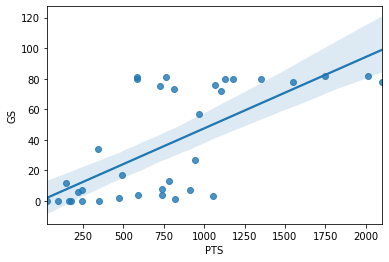

In [52]:
import seaborn as sns
sns.regplot(X_train["PTS"],y_train["GS"])

From the above plot, we see that until around 1000 points there is the average number of Games Started is between 0 and 20. However as a player cross the over 1000 PTS, players tend to start over 70 games. 

Hence given this well defined distinction, we can use a Decision Tree Regressor which will find the best splits to get the highest information gain and each leaf node will be equal to the average number of games started for that range of PTS scored.

In [53]:
X_train_GS = X_train[["PTS","AST","TRB","BLK"]]

In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
dtree_parameters = {'max_depth': range(5,50),'max_leaf_nodes':range(5,20)}
dtree_reg = DecisionTreeRegressor(random_state = 42)
rand_dtree = RandomizedSearchCV(estimator = dtree_reg, param_distributions=dtree_parameters, cv = 5, n_iter = 20, verbose=2)

In [55]:
rand_dtree.fit(X_train_GS,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ....................max_depth=33, max_leaf_nodes=18; total time=   0.0s
[CV] END ....................max_depth=33, max_leaf_nodes=18; total time=   0.0s
[CV] END ....................max_depth=33, max_leaf_nodes=18; total time=   0.0s
[CV] END ....................max_depth=33, max_leaf_nodes=18; total time=   0.0s
[CV] END ....................max_depth=33, max_leaf_nodes=18; total time=   0.0s
[CV] END ....................max_depth=30, max_leaf_nodes=15; total time=   0.0s
[CV] END ....................max_depth=30, max_leaf_nodes=15; total time=   0.0s
[CV] END ....................max_depth=30, max_leaf_nodes=15; total time=   0.0s
[CV] END ....................max_depth=30, max_leaf_nodes=15; total time=   0.0s
[CV] END ....................max_depth=30, max_leaf_nodes=15; total time=   0.0s
[CV] END ....................max_depth=40, max_leaf_nodes=19; total time=   0.0s
[CV] END ....................max_depth=40, max_

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': range(5, 50),
                                        'max_leaf_nodes': range(5, 20)},
                   verbose=2)

In [56]:
rand_dtree.cv_results_

{'mean_fit_time': array([0.00698085, 0.00497913, 0.00319891, 0.00379176, 0.0037972 ,
        0.00398932, 0.00418925, 0.00299115, 0.00359044, 0.00399127,
        0.00419593, 0.00397701, 0.00378237, 0.00358629, 0.0041944 ,
        0.00439105, 0.00399036, 0.00359917, 0.00897946, 0.00418954]),
 'std_fit_time': array([2.27487462e-03, 1.41589625e-03, 3.94268196e-04, 7.48890851e-04,
        1.17774619e-03, 6.31128171e-04, 7.47823230e-04, 1.43368686e-06,
        4.88597160e-04, 8.92284819e-04, 1.46104176e-03, 1.08736238e-03,
        7.54546999e-04, 8.02328589e-04, 1.46541351e-03, 7.97810791e-04,
        8.93296319e-04, 4.79156551e-04, 3.98666157e-03, 3.98612832e-04]),
 'mean_score_time': array([0.00578809, 0.00301695, 0.00278339, 0.00260134, 0.00398211,
        0.00299196, 0.00239258, 0.00479236, 0.00259304, 0.00299034,
        0.00299063, 0.00380316, 0.00280638, 0.00279622, 0.00458484,
        0.00259757, 0.00239253, 0.00457902, 0.00657825, 0.00259213]),
 'std_score_time': array([0.00364365, 

In [57]:
rand_dtree.best_params_

{'max_leaf_nodes': 7, 'max_depth': 26}

In [58]:
rand_dtree.best_estimator_.predict(X_test[["PTS","AST","TRB","BLK"]])

array([13.42857143, 68.33333333, 13.42857143, 13.42857143, 68.33333333,
       13.42857143, 79.66666667, 68.33333333, 77.66666667])

In [59]:
idx = Complete_df.loc[Complete_df["GS"].isna()].index.values.tolist()
Complete_df.loc[Complete_df["GS"].isna(),"GS"] = rand_dtree.best_estimator_.predict(Complete_df.loc[Complete_df["GS"].isna()][["PTS","AST","TRB","BLK"]])

In [60]:
Complete_df.loc[Complete_df["GS"]>Complete_df["G"],"GS"] = Complete_df.loc[Complete_df["GS"]>Complete_df["G"]]["G"]

In [61]:
missing_data_df = numberofnan(Complete_df)
display(missing_data_df.style.background_gradient(cmap = 'Reds',axis = 0))

,Column Name,Number of Missing values,% of missing values
0,Player,0,0.000000
1,Pos,0,0.000000
2,Age,0,0.000000
3,Tm,0,0.000000
4,G,0,0.000000
5,GS,0,0.000000
6,MP,0,0.000000
7,FG,0,0.000000
8,FGA,0,0.000000
9,FG%,0,0.000000


All missing data is filled in now.

In [62]:
Complete_df.to_csv('Cleandf.csv',index = False)